## Cleaning categorical data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime

### Import file

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
print(customer_df.shape)
customer_df.head(2)

(9134, 24)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


In [3]:
# We drop the customer_id column because it doesn't provide relevant information.

In [4]:
pd.set_option('display.max_columns', None)
customer_df.columns = customer_df.columns.str.replace(' ', '_').str.lower()
customer_df.drop(['customer'], axis=1, inplace=True)
customer_df.head(3)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


### Split numericals_df and categorical_df

In [5]:
numerical_df = customer_df.select_dtypes('number')
numerical_df.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247


In [6]:
categorical_df = customer_df.select_dtypes('object')
categorical_df.head(3)

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize


### Categorical variable plots

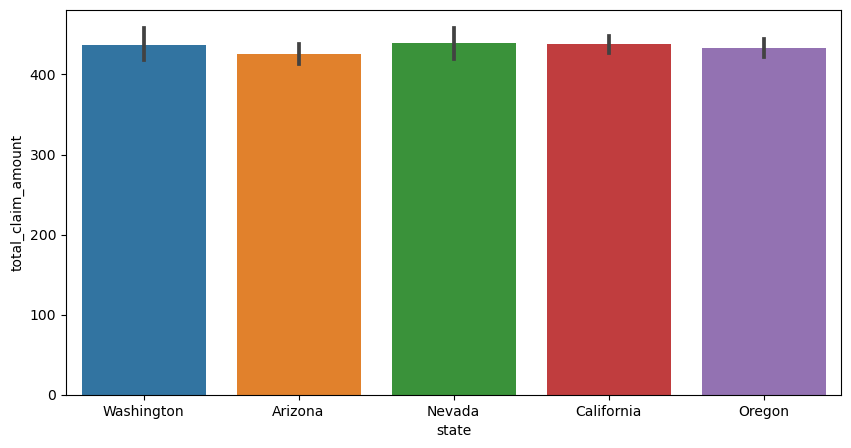

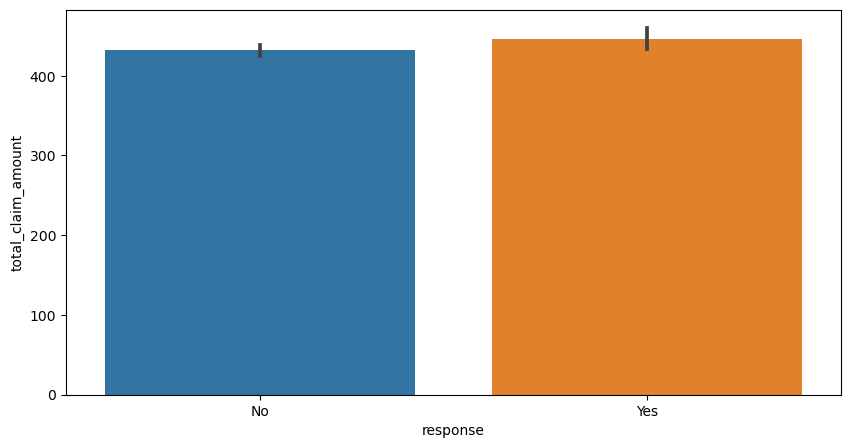

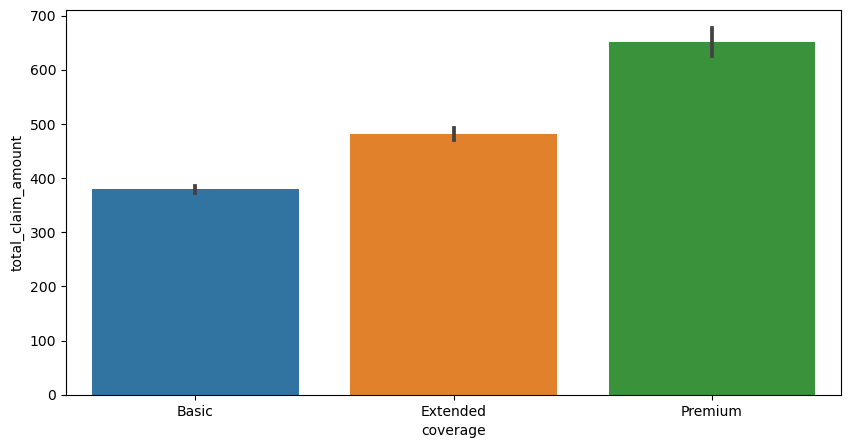

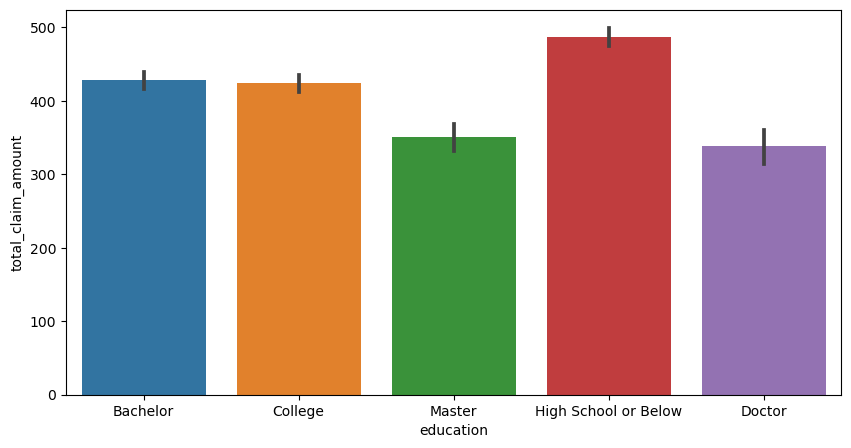

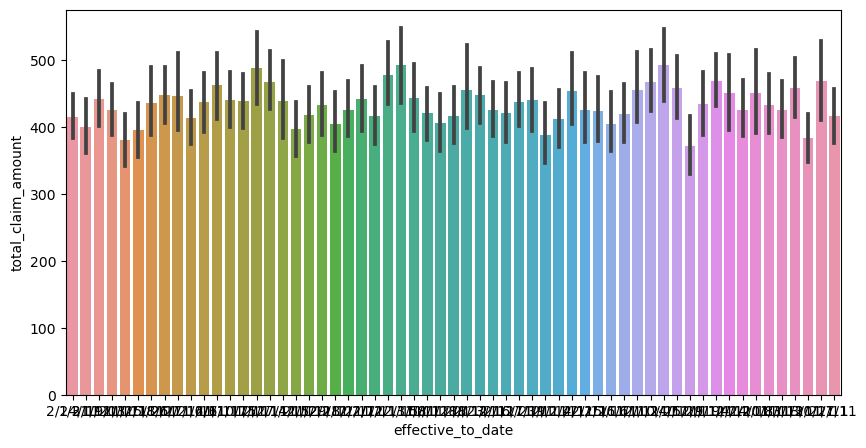

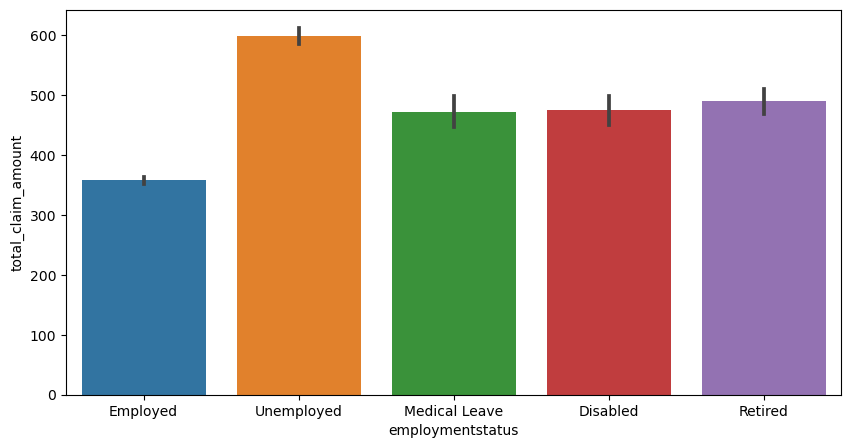

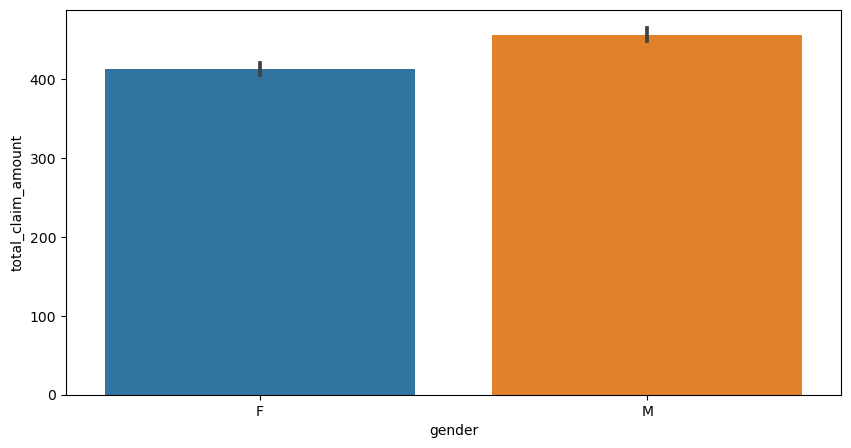

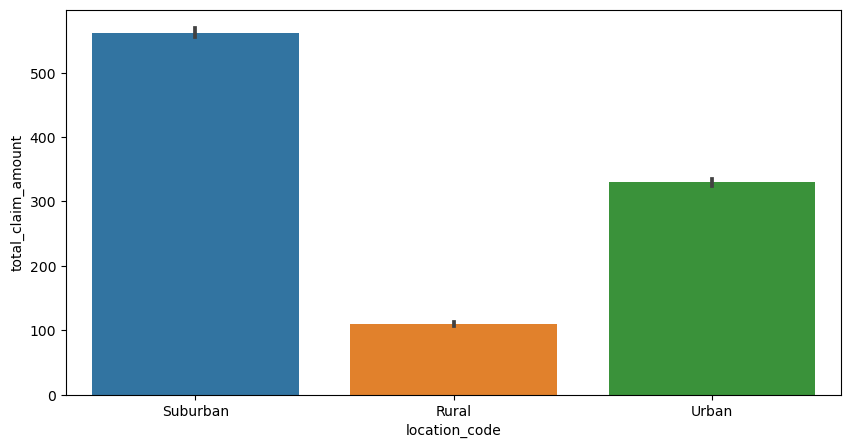

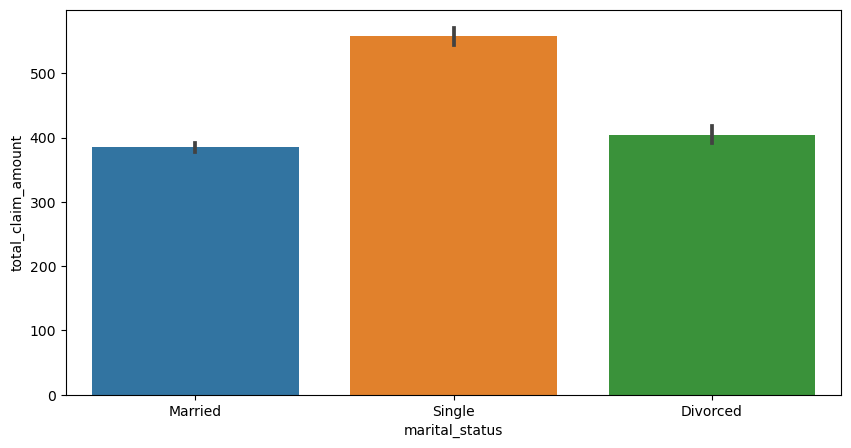

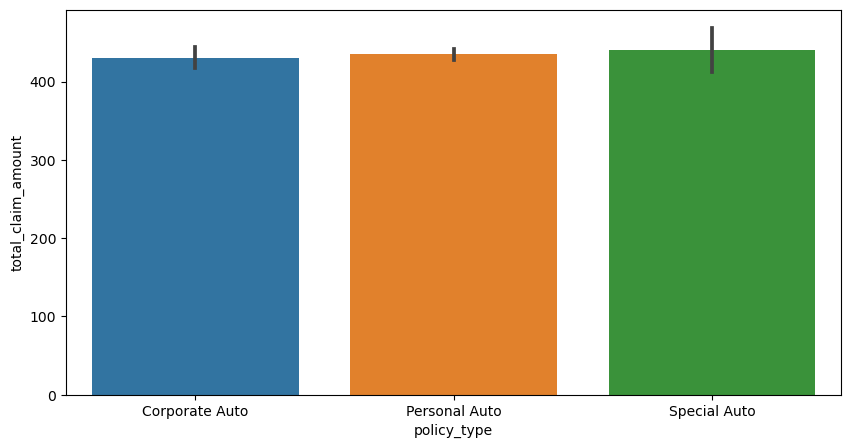

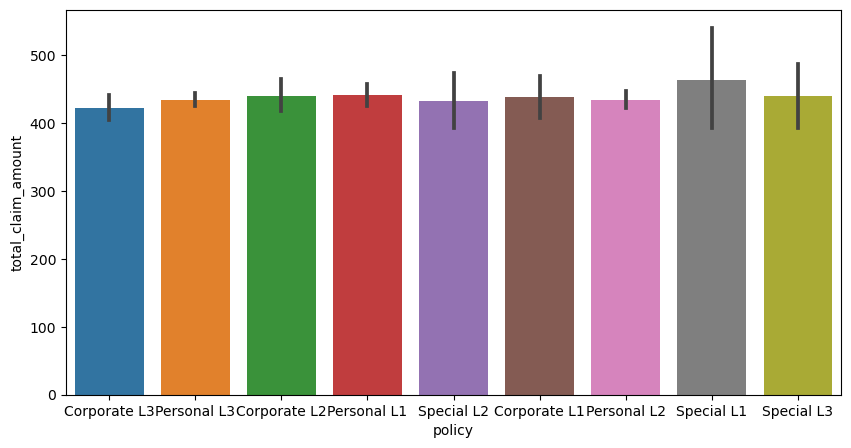

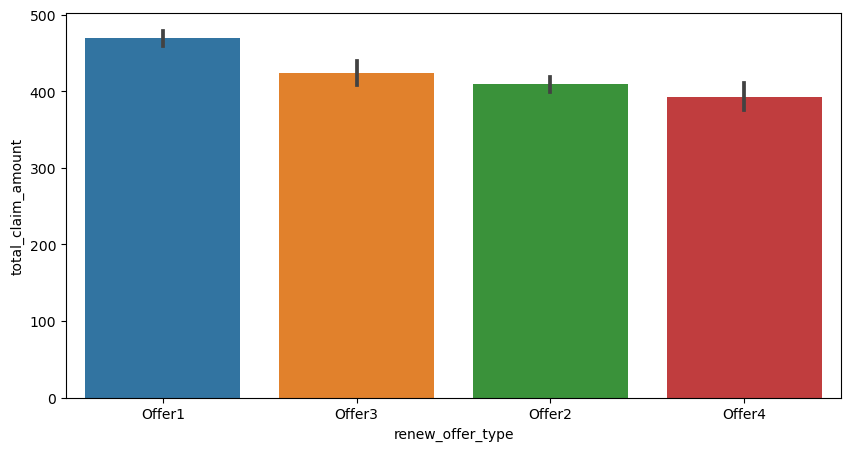

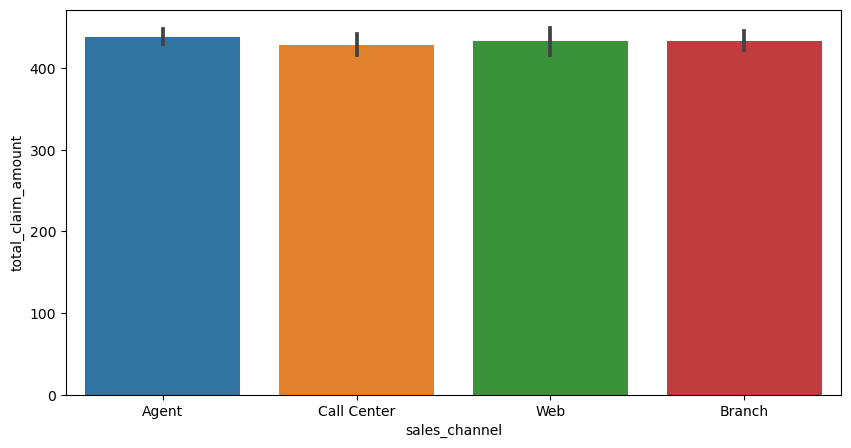

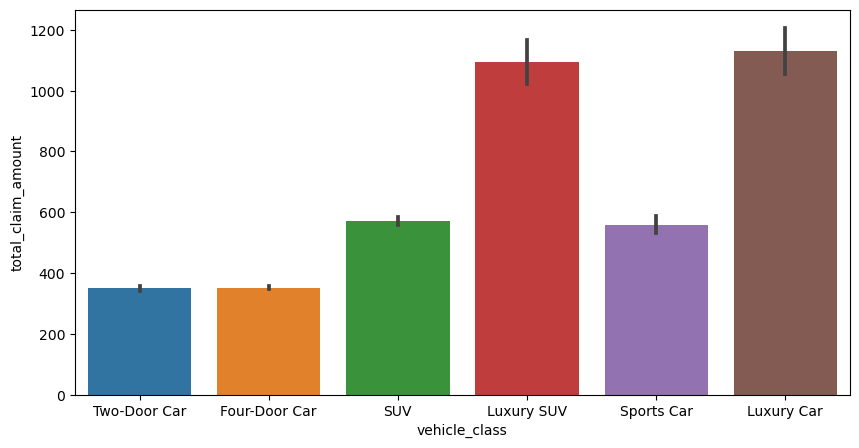

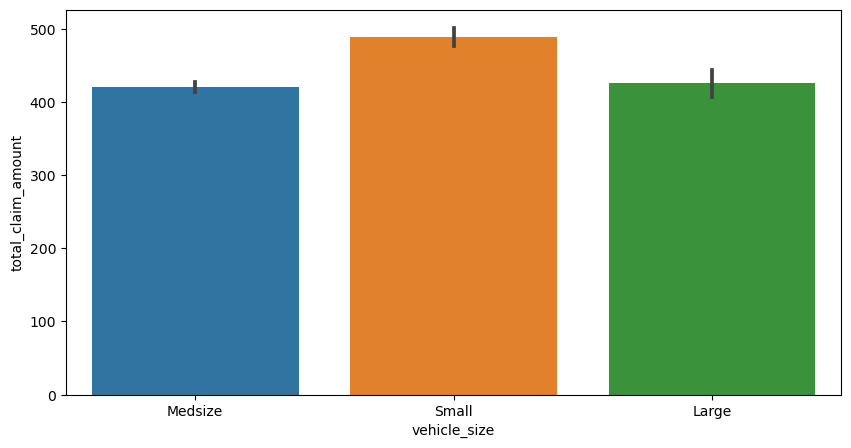

In [7]:
for column in categorical_df:
    plt.figure(figsize=(10,5))
    sns.barplot(data=categorical_df, x=column, y=numerical_df['total_claim_amount'])
    plt.show()

In [8]:
#There area some variables such as state, response, gender, policy type, policy and sales channel, 
#that do not have a significant change from the total_claim_amount, so they could possibly be removed.

### Time variable plot

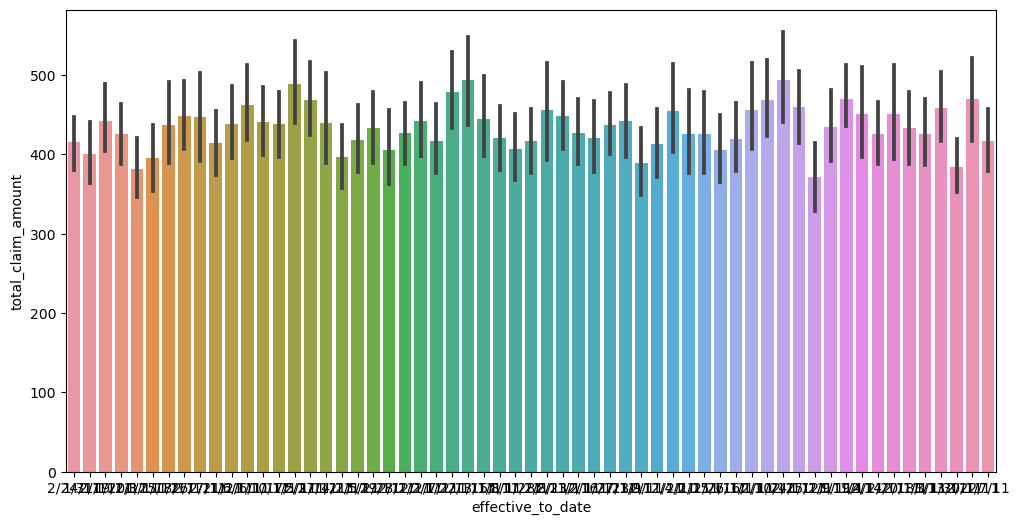

In [9]:
plt.figure(figsize=(12,6))
sns.barplot(data=categorical_df, x=categorical_df['effective_to_date'], y=numerical_df['total_claim_amount'])
plt.show()

In [33]:
# It can be extracted the month from the dates

In [18]:
categorical_df['effective_to_date'].value_counts().keys()

Index(['1/10/11', '1/27/11', '2/14/11', '1/26/11', '1/17/11', '1/19/11',
       '1/31/11', '1/3/11', '1/20/11', '2/26/11', '1/28/11', '2/19/11',
       '1/5/11', '2/27/11', '1/11/11', '2/4/11', '2/10/11', '2/28/11',
       '1/2/11', '1/21/11', '1/29/11', '2/22/11', '2/5/11', '2/3/11', '2/7/11',
       '2/12/11', '1/23/11', '2/1/11', '1/18/11', '1/15/11', '1/14/11',
       '2/11/11', '1/7/11', '1/25/11', '2/25/11', '1/8/11', '2/18/11',
       '2/2/11', '1/1/11', '2/21/11', '1/24/11', '1/9/11', '1/30/11',
       '1/13/11', '2/6/11', '1/6/11', '2/23/11', '1/16/11', '2/16/11',
       '2/13/11', '2/24/11', '2/9/11', '2/17/11', '1/22/11', '2/8/11',
       '2/20/11', '2/15/11', '1/12/11', '1/4/11'],
      dtype='object')

In [28]:
# The effective_to_date column date format is month/day/year, 
# therefore it is only necessary to extract the first digit of the strings

In [26]:
def month(x):
    if len(x)>7:
        return np.nan
    else:
        pattern = r'\d'
        month = re.search(pattern, x)[0]
        return int(month)

In [30]:
# The previously defined function is validated

test = '2/16/11'
pattern = r'\d'
re.search(pattern, test)[0]

'2'

In [34]:
#A new column is added just with the months.

customer_df['effective_to_month'] = list(map(month,customer_df['effective_to_date']))
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_to_month
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [36]:
numerical_df = customer_df.select_dtypes('number')
numerical_df.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_month
0,2763.519279,56274,69,32,5,0,1,384.811147,2
1,6979.535903,0,94,13,42,0,8,1131.464935,1
2,12887.431650,48767,108,18,38,0,2,566.472247,2


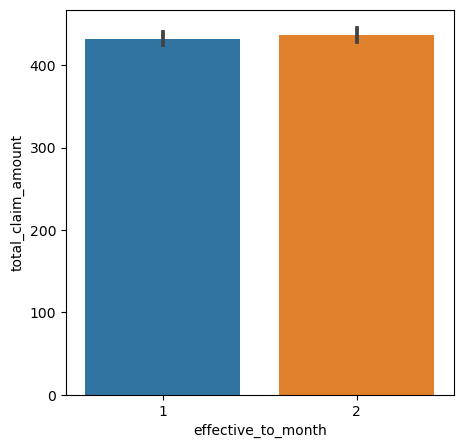

In [41]:
plt.figure(figsize=(5,5))
sns.barplot(data=numerical_df, x='effective_to_month', y=numerical_df['total_claim_amount'])
plt.show()